### Grupo:

Lucas Sobral  
Leonardo Reis  
Marco Binda  
Rhuan Victor

Import pandas

In [1]:
import pandas as pd
import re

pd.set_option('display.max_rows', 200)

# Carregar o dataframe `escolas` do arquivo csv.

In [2]:
escolas = pd.read_csv('data/escolas.csv')
escolas

,id,Escolas_Postos,BAIRRO,ENDEREÇO,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"
5,17,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. Barão da Torre, 90","-22,983332","-43,199036"
6,55,EM SANTA CATARINA,SANTA TERESA,Rua Eduardo Santos 38,"-22,915535","-43,191588"
7,490,E.M TIA CIATA,CENTRO,Avenida Presidente Vargas S/Nº,"-22,907123","-43,195068"
8,600,EM URUGUAI,BENFICA,Rua Ana Néri 192,"-22,898488","-43,237756"
9,89,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148","-22,917233","-43,211044"


## Renomear as colunas do dataframe `escolas` e aplicar o padrão snake case.

In [3]:
column_mapping = {
    'id': 'id',
    'Escolas_Postos': 'nome_escola',
    'BAIRRO': 'bairro',
    'ENDEREÇO ': 'logradouro_entrega',
    'lat': 'latitude',
    'lon': 'longitude'
}

escolas.rename(columns=column_mapping,inplace=True)
escolas

,id,nome_escola,bairro,logradouro_entrega,latitude,longitude
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"
5,17,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. Barão da Torre, 90","-22,983332","-43,199036"
6,55,EM SANTA CATARINA,SANTA TERESA,Rua Eduardo Santos 38,"-22,915535","-43,191588"
7,490,E.M TIA CIATA,CENTRO,Avenida Presidente Vargas S/Nº,"-22,907123","-43,195068"
8,600,EM URUGUAI,BENFICA,Rua Ana Néri 192,"-22,898488","-43,237756"
9,89,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148","-22,917233","-43,211044"


## Mudar o tipo de dados da coluna `id`para string e preencher com zeros (à esquerda) até len = 3.

In [4]:
escolas['id'] = escolas['id'].astype(str).str.zfill(3)
escolas

,id,nome_escola,bairro,logradouro_entrega,latitude,longitude
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. Barão da Torre, 90","-22,983332","-43,199036"
6,055,EM SANTA CATARINA,SANTA TERESA,Rua Eduardo Santos 38,"-22,915535","-43,191588"
7,490,E.M TIA CIATA,CENTRO,Avenida Presidente Vargas S/Nº,"-22,907123","-43,195068"
8,600,EM URUGUAI,BENFICA,Rua Ana Néri 192,"-22,898488","-43,237756"
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148","-22,917233","-43,211044"


## Substituir os valores da coluna `bairro` no dataframe `escolas` com os valores corretos do dataframe `subprefeituras`.

Para alguns valores, como 'Maracanã/ Vila Isabel', 'Maracanã/ Tijuca', 'Recreio', 'Rio Das Pedras', 'Freguesia Jpa', 'Augusto Vasconcelos' e 'Nova Sepetiba', foi feita busca na internet para identificar o bairro correto.

In [5]:
bairros = {
'HUMAITA':'HUMAITÁ', 
'MARACANÃ/ VILA ISABEL':'VILA ISABEL',
'MARACANÃ/ TIJUCA':'VILA ISABEL',
'MEIER':'MÉIER', 
'INHAUMA':'INHAÚMA',
'OSWALDO CRUZ':'OSVALDO CRUZ',
'GARDENIA AZUL':'GARDÊNIA AZUL',
'RECREIO':'RECREIO DOS BANDEIRANTES',
'RIO DAS PEDRAS':'JACAREPAGUÁ',
'FREGUESIA JPA': 'FREGUESIA (JACAREPAGUÁ)',
'AUGUSTO VASCONCELOS':'SENADOR VASCONCELOS',
'PACIENCIA':'PACIÊNCIA',
'NOVA SEPETIBA': 'SEPETIBA'
}

escolas1 = escolas
escolas1['bairro'] = escolas1['bairro'].replace(bairros)
escolas1

,id,nome_escola,bairro,logradouro_entrega,latitude,longitude
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. Barão da Torre, 90","-22,983332","-43,199036"
6,055,EM SANTA CATARINA,SANTA TERESA,Rua Eduardo Santos 38,"-22,915535","-43,191588"
7,490,E.M TIA CIATA,CENTRO,Avenida Presidente Vargas S/Nº,"-22,907123","-43,195068"
8,600,EM URUGUAI,BENFICA,Rua Ana Néri 192,"-22,898488","-43,237756"
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148","-22,917233","-43,211044"


## Transformar todas as colunas com tipo de dados string para upper case.

In [6]:
escolas2 = escolas1.apply(lambda x:x.astype(str).str.upper())
escolas2

,id,nome_escola,bairro,logradouro_entrega,latitude,longitude
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA ÉBANO 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,PRAÇA ARGENTINA 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRAÇA CONDESSA PAULO DE FRONTIN 45,"-22,924412","-43,208579"
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. BARÃO DA TORRE, 90","-22,983332","-43,199036"
6,055,EM SANTA CATARINA,SANTA TERESA,RUA EDUARDO SANTOS 38,"-22,915535","-43,191588"
7,490,E.M TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS S/Nº,"-22,907123","-43,195068"
8,600,EM URUGUAI,BENFICA,RUA ANA NÉRI 192,"-22,898488","-43,237756"
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. HADDOCK LOBO, 148","-22,917233","-43,211044"


## Remover acentos de todas as colunas com tipo de dados string.

In [7]:
cols = escolas2.select_dtypes(include=[object]).columns
escolas3 = escolas2
escolas3[cols] = escolas2.apply(lambda x:x.str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8'))
escolas3

,id,nome_escola,bairro,logradouro_entrega,latitude,longitude
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/No,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,"-22,924412","-43,208579"
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. BARAO DA TORRE, 90","-22,983332","-43,199036"
6,055,EM SANTA CATARINA,SANTA TERESA,RUA EDUARDO SANTOS 38,"-22,915535","-43,191588"
7,490,E.M TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS S/No,"-22,907123","-43,195068"
8,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,"-22,898488","-43,237756"
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. HADDOCK LOBO, 148","-22,917233","-43,211044"


## Identificar registros duplicados em `escolas`.

In [8]:
duplicates_mask = escolas3.duplicated(subset='id',keep=False)
duplicates_df = escolas3[duplicates_mask]
duplicates_df.sort_values('id')

,id,nome_escola,bairro,logradouro_entrega,latitude,longitude
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. BARAO DA TORRE, 90","-22,983332","-43,199036"
20,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. BARAO DA TORRE, 90","-22,983332","-43,199036"
135,069,ESCOLA MUNICIPAL CARDEAL ARCOVERDE,MADUREIRA,RUA AGOSTINHO BARBALHO 401,"-22,876082","-43,343369"
80,069,ESCOLA MUNICIPAL CARDEAL ARCOVERDE,MADUREIRA,RUA AGOSTINHO BARBALHO 401,"-22,876082","-43,343369"
143,069,ESCOLA MUNICIPAL CARDEAL ARCOVERDE,MADUREIRA,RUA AGOSTINHO BARBALHO 401,"-22,876082","-43,343369"
69,069,ESCOLA MUNICIPAL CARDEAL ARCOVERDE,MADUREIRA,RUA AGOSTINHO BARBALHO 401,"-22,876082","-43,343369"
151,069,ESCOLA MUNICIPAL CARDEAL ARCOVERDE,MADUREIRA,RUA AGOSTINHO BARBALHO 401,"-22,876082","-43,343369"
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. HADDOCK LOBO, 148","-22,917233","-43,211044"
57,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. HADDOCK LOBO, 148","-22,917233","-43,211044"
25,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. HADDOCK LOBO, 148","-22,917233","-43,211044"


## Eliminar registros duplicados da coluna `escolas`.

Os registros de índices 117, 112 e 15 não foram eliminados com a função `drop_duplicates()` por conter ligeiras diferenças com suas contrapartes, como a falta de uma vírgula, a presença de um caracter especial ou um erro de digitação. Dessa forma, sua eliminação foi manual.

* 117	206	EM HONDURAS - sem vírgula na latitude e longitude
* 112	379	CIEP NELSON MANDELA - º no endereço
* 15	413	EM CÓCIO BARCELOS - latitude incompleta

In [9]:
escolas4 = escolas3.drop_duplicates()
escolas4 = escolas4.drop([117,112,15]) # elimina escolas duplicadas, mas com ligeira diferença no registro
escolas4

,id,nome_escola,bairro,logradouro_entrega,latitude,longitude
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/No,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,"-22,924412","-43,208579"
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. BARAO DA TORRE, 90","-22,983332","-43,199036"
6,055,EM SANTA CATARINA,SANTA TERESA,RUA EDUARDO SANTOS 38,"-22,915535","-43,191588"
7,490,E.M TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS S/No,"-22,907123","-43,195068"
8,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,"-22,898488","-43,237756"
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. HADDOCK LOBO, 148","-22,917233","-43,211044"


## Identificar valores duplicados na latitude e longitude

In [10]:
duplicates_mask = escolas4.duplicated(subset=['latitude','longitude'],keep=False)
duplicates_df = escolas4[duplicates_mask]
duplicates_df.sort_values('id')

,id,nome_escola,bairro,logradouro_entrega,latitude,longitude
70,090,EM THOMAS JEFFERSON,ACARI,AVENIDA PASTOR MARTIN LUTHER KING JR S/No,"-22,81631","-43,340149"
121,255,CIEP FRANCISCO CAVALCANTE PONTES DE MIRANDA,SENADOR VASCONCELOS,ESTRADA MORICABA S/No,"-22,925293","-43,566649"
73,390,E.M. ANDREA FONTES PEIXOTO,PARQUE COLUMBIA,RUA FAUSTO E CASTRO S/No,"-22,81631","-43,340149"
120,399,CIEP CLEMENTINA DE JESUS,CAMPO GRANDE,AV. ALHAMBRA S/No,"-22,925293","-43,566649"


## Corrigir valores duplicados na latitude e longitude

Valores foram obtidos no Google Maps, utilizando 15.75z.

In [11]:
escolas4.loc[70, ['latitude', 'longitude']] = ['-22,819938', '-43,352738']
escolas4.loc[121, ['latitude', 'longitude']] = ['-22,898210', '-43,535989']
escolas4.loc[73, ['latitude', 'longitude']] = ['-22,815893', '-43,342163']
escolas4.loc[120, ['latitude', 'longitude']] = ['-22,925239', '-43,571084']

duplicates_mask = escolas4.duplicated(subset=['latitude','longitude'],keep=False)
duplicates_df = escolas4[duplicates_mask]
duplicates_df.sort_values('id')

,id,nome_escola,bairro,logradouro_entrega,latitude,longitude


## Transformar os valores das colunas `latitude` e `longitude` e arredondar para cinco casas decimais.

In [12]:
escolas5 = escolas4
escolas5['latitude'] = escolas5['latitude'].str.replace(',', '.').astype(float).round(5)
escolas5['longitude'] = escolas5['longitude'].str.replace(',', '.').astype(float).round(5)

escolas5

,id,nome_escola,bairro,logradouro_entrega,latitude,longitude
0,178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,CAJU,RUA CARLOS SEIDL S/No,-22.88089,-43.22533
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,-22.88957,-43.23620
2,483,EM CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56",-22.90929,-43.18358
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,-22.89763,-43.22746
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,-22.92441,-43.20858
5,017,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. BARAO DA TORRE, 90",-22.98333,-43.19904
6,055,EM SANTA CATARINA,SANTA TERESA,RUA EDUARDO SANTOS 38,-22.91554,-43.19159
7,490,E.M TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS S/No,-22.90712,-43.19507
8,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,-22.89849,-43.23776
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. HADDOCK LOBO, 148",-22.91723,-43.21104


## Padronizar o tipo da escola na coluna `nome_escola`

In [13]:
tipo_escola = {
'CENTRO INTEGRADO DE EDUCACAO PUBLICA':'CIEP', 
'E.M ':'EM ',
'E.M. ':'EM ',
'EM. ':'EM ', 
'ESCOLA MUNICIPAL ':'EM '
}

escolas6 = escolas5
for key, value in tipo_escola.items():
    escolas6['nome_escola'] = escolas6['nome_escola'].str.replace(fr'(?i)\b{key}\b', value, regex=True)

escolas6

,id,nome_escola,bairro,logradouro_entrega,latitude,longitude
0,178,CIEP HENFIL,CAJU,RUA CARLOS SEIDL S/No,-22.88089,-43.22533
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,-22.88957,-43.23620
2,483,EM CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56",-22.90929,-43.18358
3,476,EM FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,-22.89763,-43.22746
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,-22.92441,-43.20858
5,017,EM PRESIDENTE JOSE LINHARES,IPANEMA,"R. BARAO DA TORRE, 90",-22.98333,-43.19904
6,055,EM SANTA CATARINA,SANTA TERESA,RUA EDUARDO SANTOS 38,-22.91554,-43.19159
7,490,EM TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS S/No,-22.90712,-43.19507
8,600,EM URUGUAI,BENFICA,RUA ANA NERI 192,-22.89849,-43.23776
9,089,EM MARIO CLAUDIO,RIO COMPRIDO,"R. HADDOCK LOBO, 148",-22.91723,-43.21104


## Criar coluna `tipo_escola` com valores extraídos de `nome_escola` (EM|CIEP|COLEGIO MUNICIPAL), e excluir estes valores da coluna `nome_escola`.

In [14]:
escolas7 = escolas6
escolas7['tipo_escola'] = escolas7['nome_escola'].str.extract(r'(EM |CIEP |COLEGIO MUNICIPAL )', expand=False)
escolas7['nome_escola'] = escolas7['nome_escola'].str.replace(r'(EM |CIEP |COLEGIO MUNICIPAL )', '', regex=True).str.strip()
cols = ['id','nome_escola','tipo_escola','logradouro_entrega','bairro','latitude','longitude']
escolas7 = escolas7[cols]
escolas7

,id,nome_escola,tipo_escola,logradouro_entrega,bairro,latitude,longitude
0,178,HENFIL,CIEP,RUA CARLOS SEIDL S/No,CAJU,-22.88089,-43.22533
1,634,ALICE DO AMARAL PEIXOTO,EM,RUA EBANO 187,BENFICA,-22.88957,-43.23620
2,483,CELESTINO SILVA,EM,"R. DO LAVRADIO, 56",CENTRO,-22.90929,-43.18358
3,476,FLORIANO PEIXOTO,EM,PRACA ARGENTINA 20,SAO CRISTOVAO,-22.89763,-43.22746
4,132,PEREIRA PASSOS,EM,PRACA CONDESSA PAULO DE FRONTIN 45,RIO COMPRIDO,-22.92441,-43.20858
5,017,PRESIDENTE JOSE LINHARES,EM,"R. BARAO DA TORRE, 90",IPANEMA,-22.98333,-43.19904
6,055,SANTA CATARINA,EM,RUA EDUARDO SANTOS 38,SANTA TERESA,-22.91554,-43.19159
7,490,TIA CIATA,EM,AVENIDA PRESIDENTE VARGAS S/No,CENTRO,-22.90712,-43.19507
8,600,URUGUAI,EM,RUA ANA NERI 192,BENFICA,-22.89849,-43.23776
9,089,MARIO CLAUDIO,EM,"R. HADDOCK LOBO, 148",RIO COMPRIDO,-22.91723,-43.21104


## Corrigir as abreviações nos valores da coluna `logradouro_entrega`.

In [15]:
correcoes_logradouro = {
    'AV ':'AVENIDA ', 
    'AV. ':'AVENIDA ',
    'CONJ. ':'CONJUNTO ',
    'CONJ ':'CONJUNTO ',
    'ESTR. ':'ESTRADA ',
    'PCA. ': 'PRACA ',
    'R. ':'RUA ',
    'ALM. ':'ALMIRANTE ',
    'ENG. ':'ENGENHEIRO ',
    'MAL. ':'MARECHAL ',
    'SD. ':'SOLDADO ',
    'SEN. ':'SENADOR ',
    'S/No':'S/N', 
    'S/N.o':'S/N',
}

escolas8 = escolas7

for key, value in correcoes_logradouro.items():
    escolas8['logradouro_entrega'] = escolas8['logradouro_entrega'].str.replace(fr'(?i)\b{key}\b', value, regex=True)


escolas8['logradouro_entrega'] = escolas8['logradouro_entrega'].str.replace(r'[.,]', '', regex=True)
escolas8['logradouro_entrega'] = escolas8['logradouro_entrega'].str.replace(r'(\d+)\s+(\d+)', r'\1\2')

escolas8

,id,nome_escola,tipo_escola,logradouro_entrega,bairro,latitude,longitude
0,178,HENFIL,CIEP,RUA CARLOS SEIDL S/N,CAJU,-22.88089,-43.22533
1,634,ALICE DO AMARAL PEIXOTO,EM,RUA EBANO 187,BENFICA,-22.88957,-43.23620
2,483,CELESTINO SILVA,EM,RUA DO LAVRADIO 56,CENTRO,-22.90929,-43.18358
3,476,FLORIANO PEIXOTO,EM,PRACA ARGENTINA 20,SAO CRISTOVAO,-22.89763,-43.22746
4,132,PEREIRA PASSOS,EM,PRACA CONDESSA PAULO DE FRONTIN 45,RIO COMPRIDO,-22.92441,-43.20858
5,017,PRESIDENTE JOSE LINHARES,EM,RUA BARAO DA TORRE 90,IPANEMA,-22.98333,-43.19904
6,055,SANTA CATARINA,EM,RUA EDUARDO SANTOS 38,SANTA TERESA,-22.91554,-43.19159
7,490,TIA CIATA,EM,AVENIDA PRESIDENTE VARGAS S/N,CENTRO,-22.90712,-43.19507
8,600,URUGUAI,EM,RUA ANA NERI 192,BENFICA,-22.89849,-43.23776
9,089,MARIO CLAUDIO,EM,RUA HADDOCK LOBO 148,RIO COMPRIDO,-22.91723,-43.21104


## Transformar os caracteres numéricos em `logradouro_entrega` que não são o número do imóvel de algarismos para extenso.

In [16]:
correcoes_logradouro = {
    'BOULEVARD 28 ':'BOULEVARD VINTE E OITO ', 
    ' RUA 3':' RUA TRES',
    'KM 10 ':'KM DEZ ',
    'CANAL 3 ':'CANAL TRES ',
    ' BLOCO 1':' BLOCO UM'
}

escolas9 = escolas8

for key, value in correcoes_logradouro.items():
    escolas9['logradouro_entrega'] = escolas9['logradouro_entrega'].str.replace(fr'(?i)\b{key}\b', value, regex=True)

escolas9

,id,nome_escola,tipo_escola,logradouro_entrega,bairro,latitude,longitude
0,178,HENFIL,CIEP,RUA CARLOS SEIDL S/N,CAJU,-22.88089,-43.22533
1,634,ALICE DO AMARAL PEIXOTO,EM,RUA EBANO 187,BENFICA,-22.88957,-43.23620
2,483,CELESTINO SILVA,EM,RUA DO LAVRADIO 56,CENTRO,-22.90929,-43.18358
3,476,FLORIANO PEIXOTO,EM,PRACA ARGENTINA 20,SAO CRISTOVAO,-22.89763,-43.22746
4,132,PEREIRA PASSOS,EM,PRACA CONDESSA PAULO DE FRONTIN 45,RIO COMPRIDO,-22.92441,-43.20858
5,017,PRESIDENTE JOSE LINHARES,EM,RUA BARAO DA TORRE 90,IPANEMA,-22.98333,-43.19904
6,055,SANTA CATARINA,EM,RUA EDUARDO SANTOS 38,SANTA TERESA,-22.91554,-43.19159
7,490,TIA CIATA,EM,AVENIDA PRESIDENTE VARGAS S/N,CENTRO,-22.90712,-43.19507
8,600,URUGUAI,EM,RUA ANA NERI 192,BENFICA,-22.89849,-43.23776
9,089,MARIO CLAUDIO,EM,RUA HADDOCK LOBO 148,RIO COMPRIDO,-22.91723,-43.21104


## Criar coluna `numero`, extraindo esta informação da coluna `logradouro_entrega`, remover pontos, vírgulas, hífens e números (algarismos) da coluna `logradouro_entrega` e reordenar colunas.

In [17]:
escolas10 = escolas9

escolas10['numero'] = escolas10['logradouro_entrega'].str.extract(r'(\d+)')
escolas10['logradouro_entrega'] = escolas10['logradouro_entrega'].str.replace(r'(\d+)', '',regex=True).str.strip()
escolas10['logradouro_entrega'] = escolas10['logradouro_entrega'].str.replace(r'[,.]', '',regex=True).str.strip()
escolas10['logradouro_entrega'] = escolas10['logradouro_entrega'].str.replace(r' -', '',regex=True).str.strip()
escolas10['logradouro_entrega'] = escolas10['logradouro_entrega'].str.replace(r'( S/N|S/N )', '',regex=True).str.strip()

cols = ['id','nome_escola','tipo_escola','logradouro_entrega','numero','bairro','latitude','longitude']
escolas10 = escolas10[cols]

escolas10

,id,nome_escola,tipo_escola,logradouro_entrega,numero,bairro,latitude,longitude
0,178,HENFIL,CIEP,RUA CARLOS SEIDL,NaN,CAJU,-22.88089,-43.22533
1,634,ALICE DO AMARAL PEIXOTO,EM,RUA EBANO,187,BENFICA,-22.88957,-43.23620
2,483,CELESTINO SILVA,EM,RUA DO LAVRADIO,56,CENTRO,-22.90929,-43.18358
3,476,FLORIANO PEIXOTO,EM,PRACA ARGENTINA,20,SAO CRISTOVAO,-22.89763,-43.22746
4,132,PEREIRA PASSOS,EM,PRACA CONDESSA PAULO DE FRONTIN,45,RIO COMPRIDO,-22.92441,-43.20858
5,017,PRESIDENTE JOSE LINHARES,EM,RUA BARAO DA TORRE,90,IPANEMA,-22.98333,-43.19904
6,055,SANTA CATARINA,EM,RUA EDUARDO SANTOS,38,SANTA TERESA,-22.91554,-43.19159
7,490,TIA CIATA,EM,AVENIDA PRESIDENTE VARGAS,NaN,CENTRO,-22.90712,-43.19507
8,600,URUGUAI,EM,RUA ANA NERI,192,BENFICA,-22.89849,-43.23776
9,089,MARIO CLAUDIO,EM,RUA HADDOCK LOBO,148,RIO COMPRIDO,-22.91723,-43.21104


# Carregar o dataframe `material_didatico` do arquivo csv.

In [18]:
material_didatico = pd.read_csv('data/material_didatico.csv')
material_didatico

,id,Quantidade
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67
5,410,397
6,55,92
7,490,578
8,600,591
9,89,473


## Renomear as colunas do dataframe `material_didatico` e aplicar o padrão snake case.

In [19]:
column_mapping = {
    'id': 'id',
    'Quantidade': 'qt_material_didatico'
}

material_didatico.rename(columns=column_mapping,inplace=True)
material_didatico

,id,qt_material_didatico
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67
5,410,397
6,55,92
7,490,578
8,600,591
9,89,473


## Mudar o tipo de dados da coluna `id` para string e preencher com zeros (à esquerda) até len = 3.

In [20]:
material_didatico['id'] = material_didatico['id'].astype(str).str.zfill(3)
material_didatico

,id,qt_material_didatico
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67
5,410,397
6,055,92
7,490,578
8,600,591
9,089,473


## Limpar os dados na coluna `qt_material_didatico`, excluir valores NaN e vazios em 0 e mudar tipo dos valores da coluna `qt_material_didatico` para inteiro.

Na ausência de valores hitóricos, não é possível estimar/inferir valores para as escolas com valores zerados. Por esse motivo, serão retiradas da amostra, para melhorar o desempenho da otimização da rota.

In [21]:
material_didatico1 = material_didatico

material_didatico1['qt_material_didatico'] = material_didatico1['qt_material_didatico'].str.replace(r'(\'\'|\'NaN\'|\' \')', '0',regex=True).str.strip()
material_didatico1['qt_material_didatico'] = material_didatico1['qt_material_didatico'].replace('\'', '',regex=True).str.strip()
material_didatico1['qt_material_didatico'] = material_didatico1['qt_material_didatico'].fillna(0)

material_didatico1['qt_material_didatico'] = material_didatico1['qt_material_didatico'].astype(int)
material_didatico1 = material_didatico1[material_didatico1['qt_material_didatico'] != 0]

material_didatico1

,id,qt_material_didatico
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67
5,410,397
6,055,92
7,490,578
8,600,591
9,089,473


# Carregar o dataframe `subprefeituras` do arquivo csv.

In [22]:
subprefeituras = pd.read_csv('data/subprefeituras.csv')
subprefeituras

,nome,subprefeitura
0,Santo Cristo,Centro
1,Gamboa,Centro
2,Saúde,Centro
3,Caju,Centro
4,Centro,Centro
5,Lapa,Centro
6,Rio Comprido,Centro
7,Cidade Nova,Centro
8,Catumbi,Centro
9,Estácio,Centro


## Renomear as colunas do dataframe `subprefeituras` e aplicar o padrão snake case.

In [23]:
column_mapping = {
    'nome': 'bairro',
    'subprefeitura': 'subprefeitura'
}

subprefeituras.rename(columns=column_mapping,inplace=True)
subprefeituras

,bairro,subprefeitura
0,Santo Cristo,Centro
1,Gamboa,Centro
2,Saúde,Centro
3,Caju,Centro
4,Centro,Centro
5,Lapa,Centro
6,Rio Comprido,Centro
7,Cidade Nova,Centro
8,Catumbi,Centro
9,Estácio,Centro


## Transformar todas as colunas com tipo de dados string para upper case.

In [24]:
subprefeituras1 = subprefeituras
subprefeituras1 = subprefeituras1.apply(lambda x:x.astype(str).str.upper())
subprefeituras1

,bairro,subprefeitura
0,SANTO CRISTO,CENTRO
1,GAMBOA,CENTRO
2,SAÚDE,CENTRO
3,CAJU,CENTRO
4,CENTRO,CENTRO
5,LAPA,CENTRO
6,RIO COMPRIDO,CENTRO
7,CIDADE NOVA,CENTRO
8,CATUMBI,CENTRO
9,ESTÁCIO,CENTRO


## Remover acentos de todas as colunas com tipo de dados string.

In [25]:
cols = subprefeituras1.select_dtypes(include=[object]).columns
subprefeituras2 = subprefeituras1
subprefeituras2[cols] = subprefeituras1.apply(lambda x:x.str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8'))
subprefeituras2

,bairro,subprefeitura
0,SANTO CRISTO,CENTRO
1,GAMBOA,CENTRO
2,SAUDE,CENTRO
3,CAJU,CENTRO
4,CENTRO,CENTRO
5,LAPA,CENTRO
6,RIO COMPRIDO,CENTRO
7,CIDADE NOVA,CENTRO
8,CATUMBI,CENTRO
9,ESTACIO,CENTRO


# Merge dos dataframes `escolas` e `subprefeitura`

In [26]:
mesclado1 = pd.merge(escolas9,subprefeituras2,on='bairro', how='left')
mesclado1

,id,nome_escola,tipo_escola,logradouro_entrega,bairro,latitude,longitude,numero,subprefeitura
0,178,HENFIL,CIEP,RUA CARLOS SEIDL,CAJU,-22.88089,-43.22533,NaN,CENTRO
1,634,ALICE DO AMARAL PEIXOTO,EM,RUA EBANO,BENFICA,-22.88957,-43.23620,187,CENTRO
2,483,CELESTINO SILVA,EM,RUA DO LAVRADIO,CENTRO,-22.90929,-43.18358,56,CENTRO
3,476,FLORIANO PEIXOTO,EM,PRACA ARGENTINA,SAO CRISTOVAO,-22.89763,-43.22746,20,CENTRO
4,132,PEREIRA PASSOS,EM,PRACA CONDESSA PAULO DE FRONTIN,RIO COMPRIDO,-22.92441,-43.20858,45,CENTRO
5,017,PRESIDENTE JOSE LINHARES,EM,RUA BARAO DA TORRE,IPANEMA,-22.98333,-43.19904,90,ZONA SUL
6,055,SANTA CATARINA,EM,RUA EDUARDO SANTOS,SANTA TERESA,-22.91554,-43.19159,38,CENTRO
7,490,TIA CIATA,EM,AVENIDA PRESIDENTE VARGAS,CENTRO,-22.90712,-43.19507,NaN,CENTRO
8,600,URUGUAI,EM,RUA ANA NERI,BENFICA,-22.89849,-43.23776,192,CENTRO
9,089,MARIO CLAUDIO,EM,RUA HADDOCK LOBO,RIO COMPRIDO,-22.91723,-43.21104,148,CENTRO


# Merge dos dataframes `mesclado` e `material_didatico`

In [27]:
mesclado2 = pd.merge(mesclado1,material_didatico1,on='id',how='left')
mesclado2

,id,nome_escola,tipo_escola,logradouro_entrega,bairro,latitude,longitude,numero,subprefeitura,qt_material_didatico
0,178,HENFIL,CIEP,RUA CARLOS SEIDL,CAJU,-22.88089,-43.22533,NaN,CENTRO,20.0
1,634,ALICE DO AMARAL PEIXOTO,EM,RUA EBANO,BENFICA,-22.88957,-43.23620,187,CENTRO,121.0
2,483,CELESTINO SILVA,EM,RUA DO LAVRADIO,CENTRO,-22.90929,-43.18358,56,CENTRO,220.0
3,476,FLORIANO PEIXOTO,EM,PRACA ARGENTINA,SAO CRISTOVAO,-22.89763,-43.22746,20,CENTRO,190.0
4,132,PEREIRA PASSOS,EM,PRACA CONDESSA PAULO DE FRONTIN,RIO COMPRIDO,-22.92441,-43.20858,45,CENTRO,67.0
5,017,PRESIDENTE JOSE LINHARES,EM,RUA BARAO DA TORRE,IPANEMA,-22.98333,-43.19904,90,ZONA SUL,48.0
6,055,SANTA CATARINA,EM,RUA EDUARDO SANTOS,SANTA TERESA,-22.91554,-43.19159,38,CENTRO,92.0
7,490,TIA CIATA,EM,AVENIDA PRESIDENTE VARGAS,CENTRO,-22.90712,-43.19507,NaN,CENTRO,578.0
8,600,URUGUAI,EM,RUA ANA NERI,BENFICA,-22.89849,-43.23776,192,CENTRO,591.0
9,089,MARIO CLAUDIO,EM,RUA HADDOCK LOBO,RIO COMPRIDO,-22.91723,-43.21104,148,CENTRO,473.0


# Reodernação das colunas

In [28]:
mesclado3 = mesclado2

mesclado3 = mesclado3.dropna(subset=['qt_material_didatico'])
mesclado3['qt_material_didatico'] = mesclado3['qt_material_didatico'].astype(int)

cols = ['id','nome_escola','tipo_escola','logradouro_entrega','numero','bairro','subprefeitura','latitude','longitude','qt_material_didatico']
mesclado3 = mesclado3[cols]
mesclado3

C:\Users\marco\AppData\Local\Temp\ipykernel_15196\209936292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mesclado3['qt_material_didatico'] = mesclado3['qt_material_didatico'].astype(int)


,id,nome_escola,tipo_escola,logradouro_entrega,numero,bairro,subprefeitura,latitude,longitude,qt_material_didatico
0,178,HENFIL,CIEP,RUA CARLOS SEIDL,NaN,CAJU,CENTRO,-22.88089,-43.22533,20
1,634,ALICE DO AMARAL PEIXOTO,EM,RUA EBANO,187,BENFICA,CENTRO,-22.88957,-43.23620,121
2,483,CELESTINO SILVA,EM,RUA DO LAVRADIO,56,CENTRO,CENTRO,-22.90929,-43.18358,220
3,476,FLORIANO PEIXOTO,EM,PRACA ARGENTINA,20,SAO CRISTOVAO,CENTRO,-22.89763,-43.22746,190
4,132,PEREIRA PASSOS,EM,PRACA CONDESSA PAULO DE FRONTIN,45,RIO COMPRIDO,CENTRO,-22.92441,-43.20858,67
5,017,PRESIDENTE JOSE LINHARES,EM,RUA BARAO DA TORRE,90,IPANEMA,ZONA SUL,-22.98333,-43.19904,48
6,055,SANTA CATARINA,EM,RUA EDUARDO SANTOS,38,SANTA TERESA,CENTRO,-22.91554,-43.19159,92
7,490,TIA CIATA,EM,AVENIDA PRESIDENTE VARGAS,NaN,CENTRO,CENTRO,-22.90712,-43.19507,578
8,600,URUGUAI,EM,RUA ANA NERI,192,BENFICA,CENTRO,-22.89849,-43.23776,591
9,089,MARIO CLAUDIO,EM,RUA HADDOCK LOBO,148,RIO COMPRIDO,CENTRO,-22.91723,-43.21104,473


# Describe()

In [29]:
mesclado3.describe()

,latitude,longitude,qt_material_didatico
count,128.000000,128.000000,128.000000
mean,-22.900911,-43.367646,308.437500
std,0.047653,0.151489,166.402214
min,-23.019810,-43.697350,20.000000
25%,-22.926865,-43.468382,158.750000
50%,-22.897280,-43.327725,316.500000
75%,-22.871080,-43.253050,456.250000
max,-22.807690,-43.168880,599.000000


# Info()

In [30]:
mesclado3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 0 to 135
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    128 non-null    object 
 1   nome_escola           128 non-null    object 
 2   tipo_escola           128 non-null    object 
 3   logradouro_entrega    128 non-null    object 
 4   numero                77 non-null     object 
 5   bairro                128 non-null    object 
 6   subprefeitura         128 non-null    object 
 7   latitude              128 non-null    float64
 8   longitude             128 non-null    float64
 9   qt_material_didatico  128 non-null    int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 10.5+ KB


# Material escolar por subprefeitura

In [31]:
mesclado4 = mesclado3[['subprefeitura','qt_material_didatico']]
mesclado4 = mesclado4.groupby('subprefeitura').sum('qt_material_didatico').sort_values('qt_material_didatico',ascending=False)
mesclado4.to_csv(r'data/material_por_subprefeitura.csv',sep=';',decimal=',')
mesclado4

,qt_material_didatico
subprefeitura,
ZONA NORTE,13880
ZONA OESTE,8809
ZONA SUL,4256
GRANDE BANGU,3979
GRANDE TIJUCA,2616
JACAREPAGUA,2581
CENTRO,2352
ILHAS,741
BARRA DA TIJUCA,266


In [32]:
mesclado5 = mesclado2[['tipo_escola','nome_escola']]
mesclado5.groupby('tipo_escola').count().sort_values('nome_escola',ascending=False)

,nome_escola
tipo_escola,
EM,115
CIEP,20
COLEGIO MUNICIPAL,1


# Criar dataframe para calcular distância entre as escolas

Baseado neste artigo: https://github.com/fillipe-gsm/python-tsp

In [33]:
from geopy import distance
import numpy as np

In [34]:
# dist1 = pd.merge(mesclado3[['id','nome_escola','latitude','longitude']], 
#                  mesclado3[['id','nome_escola','latitude','longitude']], 
#                  how='cross')
# dist1

In [35]:
## Calcular as distâncias entre as escolas

In [36]:
# dist2 = dist1
# dist2['distancia'] = dist2.apply(lambda row: distance.distance((row['latitude_x'], row['longitude_x']), (row['latitude_y'], row['longitude_y'])).km, axis=1)
# rename_dict = {
#     'id_x':'id_origem',
#     'nome_escola_x':'escola_origem',
#     'latitude_x':'latitude_origem',
#     'longitude_x':'longitude_origem',
#     'id_y':'id_destino',
#     'nome_escola_y':'escola_destino',
#     'latitude_y':'latitude_destino',
#     'longitude_y':'longitude_destino'}
# dist2 = dist2.rename(columns=rename_dict)


In [37]:
# dist2.to_csv(r'data/distancias.csv',sep=';',decimal=',')

In [38]:
# dist3 = dist2[['id_origem','id_destino','distancia']]
# dist3.sort_values(['id_origem','distancia'],inplace=True)
# dist3

In [39]:
# pip install python-tsp
from python_tsp.distances import great_circle_distance_matrix
from python_tsp.heuristics import solve_tsp_local_search, solve_tsp_simulated_annealing
from python_tsp.exact import solve_tsp_dynamic_programming

## Criar dataframe com latitudes e longitudes das escolas

In [40]:
origem = mesclado3[['latitude','longitude']]
origem = np.array(origem)
origem

array([[-22.88089, -43.22533],
       [-22.88957, -43.2362 ],
       [-22.90929, -43.18358],
       [-22.89763, -43.22746],
       [-22.92441, -43.20858],
       [-22.98333, -43.19904],
       [-22.91554, -43.19159],
       [-22.90712, -43.19507],
       [-22.89849, -43.23776],
       [-22.91723, -43.21104],
       [-22.95917, -43.19972],
       [-22.92278, -43.17668],
       [-22.94071, -43.17647],
       [-22.96865, -43.18114],
       [-22.98196, -43.21358],
       [-22.95271, -43.19176],
       [-22.95382, -43.16888],
       [-22.94556, -43.18659],
       [-22.93399, -43.18101],
       [-22.92127, -43.228  ],
       [-22.92686, -43.25491],
       [-22.91545, -43.21109],
       [-22.91854, -43.26509],
       [-22.91615, -43.24705],
       [-22.92684, -43.23789],
       [-22.92906, -43.23287],
       [-22.90982, -43.23939],
       [-22.9937 , -43.23558],
       [-22.99742, -43.27218],
       [-22.89203, -43.27992],
       [-22.98156, -43.21703],
       [-22.88134, -43.29409],
       [

## Usar a função `great_circle_distance_matrix()` para criar a matriz de distância entre as escolas

In [41]:
distance_matrix = great_circle_distance_matrix(origem)
distance_matrix

array([[    0.        ,  1473.6164627 ,  5316.233333  , ...,
        44235.96578304, 36944.00812242, 39765.88409931],
       [ 1473.6164627 ,     0.        ,  5818.91466028, ...,
        42920.36599936, 35653.20886493, 38407.4527923 ],
       [ 5316.233333  ,  5818.91466028,     0.        , ...,
        47758.82887658, 40625.08844967, 43037.38027415],
       ...,
       [44235.96578304, 42920.36599936, 47758.82887658, ...,
            0.        ,  7419.81967093,  5325.14482046],
       [36944.00812242, 35653.20886493, 40625.08844967, ...,
         7419.81967094,     0.        ,  4849.56262721],
       [39765.88409931, 38407.4527923 , 43037.38027415, ...,
         5325.14482046,  4849.56262721,     0.        ]])

## Usar as funções `solve_tsp_simulated_annealing()`, `solve_tsp_local_search()` e `solve_tsp_dynamic_programming()`para resolver a otimização da rota de entrega de material entre as escolas.

A função `solve_tsp_dynamic_programming()` retorna a solução ótima para o problema, contudo o tempo de processamento aumenta exponencialmente com o tamanho da amostra.

As funções `solve_tsp_simulated_annealing()` e `solve_tsp_local_search()` são métodos heurísticos, que retornam uma solução aproximada. Conforme documentação do desenvolvedor, usar a função `solve_tsp_simulated_annealing()` (que usa o método 2-opt) e usar seu resultado como parâmetro da função `solve_tsp_local_search()`, retornam um resultado aproximado ao da função `solve_tsp_dynamic_programming()`, com um custo computacional consideravelmente inferior.

In [42]:
%%time
permutation, distance = solve_tsp_simulated_annealing(distance_matrix)
permutation2, distance2 = solve_tsp_local_search(distance_matrix, x0=permutation, perturbation_scheme="ps6")
print(distance)
print(distance2)

296471.83690276043
275813.18068234273
CPU times: total: 1min 45s
Wall time: 1min 54s


In [51]:
print(permutation2)

[0, 59, 57, 62, 63, 54, 58, 56, 48, 52, 50, 53, 55, 51, 47, 69, 71, 42, 46, 64, 61, 65, 66, 67, 96, 76, 74, 77, 68, 73, 60, 75, 86, 101, 99, 100, 97, 72, 94, 95, 98, 91, 92, 93, 90, 108, 104, 103, 49, 105, 109, 110, 106, 120, 113, 119, 116, 112, 114, 118, 115, 121, 117, 123, 122, 125, 124, 127, 126, 102, 111, 107, 83, 80, 82, 85, 88, 87, 89, 84, 78, 79, 81, 28, 27, 30, 14, 5, 13, 10, 15, 17, 16, 12, 18, 11, 2, 6, 7, 21, 9, 4, 19, 25, 24, 20, 22, 36, 34, 29, 35, 32, 37, 70, 31, 43, 41, 39, 44, 45, 40, 38, 33, 23, 26, 8, 3, 1]


In [43]:
# %%time
# permutation3, distance3 = solve_tsp_dynamic_programming(distance_matrix)
# print(distance3)

In [45]:
ordem = pd.Series(permutation2)
ordem

0        0
1       59
2       57
3       62
4       63
5       54
6       58
7       56
8       48
9       52
10      50
11      53
12      55
13      51
14      47
15      69
16      71
17      42
18      46
19      64
20      61
21      65
22      66
23      67
24      96
25      76
26      74
27      77
28      68
29      73
30      60
31      75
32      86
33     101
34      99
35     100
36      97
37      72
38      94
39      95
40      98
41      91
42      92
43      93
44      90
45     108
46     104
47     103
48      49
49     105
50     109
51     110
52     106
53     120
54     113
55     119
56     116
57     112
58     114
59     118
60     115
61     121
62     117
63     123
64     122
65     125
66     124
67     127
68     126
69     102
70     111
71     107
72      83
73      80
74      82
75      85
76      88
77      87
78      89
79      84
80      78
81      79
82      81
83      28
84      27
85      30
86      14
87       5
88      13
89      10
90      15

In [46]:
mesclado6 = mesclado3
mesclado6['ordem'] = ordem
mesclado6 = mesclado6.dropna(subset=['ordem'])
mesclado6['ordem'] = mesclado6['ordem'].astype(int)
mesclado6

C:\Users\marco\AppData\Local\Temp\ipykernel_15196\3390205746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mesclado6['ordem'] = mesclado6['ordem'].astype(int)


,id,nome_escola,tipo_escola,logradouro_entrega,numero,bairro,subprefeitura,latitude,longitude,qt_material_didatico,ordem
0,178,HENFIL,CIEP,RUA CARLOS SEIDL,NaN,CAJU,CENTRO,-22.88089,-43.22533,20,0
1,634,ALICE DO AMARAL PEIXOTO,EM,RUA EBANO,187,BENFICA,CENTRO,-22.88957,-43.23620,121,59
2,483,CELESTINO SILVA,EM,RUA DO LAVRADIO,56,CENTRO,CENTRO,-22.90929,-43.18358,220,57
3,476,FLORIANO PEIXOTO,EM,PRACA ARGENTINA,20,SAO CRISTOVAO,CENTRO,-22.89763,-43.22746,190,62
4,132,PEREIRA PASSOS,EM,PRACA CONDESSA PAULO DE FRONTIN,45,RIO COMPRIDO,CENTRO,-22.92441,-43.20858,67,63
5,017,PRESIDENTE JOSE LINHARES,EM,RUA BARAO DA TORRE,90,IPANEMA,ZONA SUL,-22.98333,-43.19904,48,54
6,055,SANTA CATARINA,EM,RUA EDUARDO SANTOS,38,SANTA TERESA,CENTRO,-22.91554,-43.19159,92,58
7,490,TIA CIATA,EM,AVENIDA PRESIDENTE VARGAS,NaN,CENTRO,CENTRO,-22.90712,-43.19507,578,56
8,600,URUGUAI,EM,RUA ANA NERI,192,BENFICA,CENTRO,-22.89849,-43.23776,591,48
9,089,MARIO CLAUDIO,EM,RUA HADDOCK LOBO,148,RIO COMPRIDO,CENTRO,-22.91723,-43.21104,473,52


In [47]:
mesclado7 = mesclado6.sort_values('ordem', ascending=True)
mesclado7.to_csv(r'data/tabela_final.csv',sep=';',decimal=',')
mesclado7

,id,nome_escola,tipo_escola,logradouro_entrega,numero,bairro,subprefeitura,latitude,longitude,qt_material_didatico,ordem
0,178,HENFIL,CIEP,RUA CARLOS SEIDL,NaN,CAJU,CENTRO,-22.88089,-43.22533,20,0
96,080,JOSE MAURO DE VASCONCELOS,EM,RUA MARLIERIA,NaN,BANGU,GRANDE BANGU,-22.85044,-43.46686,599,2
126,497,PROFESSORA LEILA MEHL MENEZES DE MATTOS,EM,AVENIDA MARIO PEREIRA DOS SANTOS,NaN,PACIENCIA,ZONA OESTE,-22.87319,-43.62773,517,3
101,495,ENGENHEIRO LAFAYETTE DE ANDRADA,EM,AVENIDA DUQUE DE CAXIAS,170,DEODORO,GRANDE BANGU,-22.85609,-43.38661,128,4
87,202,PROFESSOR TEOFILO MOREIRA DA COSTA,EM,RUA ESPERANCA,387,VARGEM GRANDE,BARRA DA TIJUCA,-22.98173,-43.49164,121,5
97,398,LEONARDO DA VINCI,EM,RUA RENATO REBECCHI,NaN,BANGU,GRANDE BANGU,-22.89253,-43.47295,315,6
98,175,NACOES UNIDAS,EM,RUA DOS LIMADORES,NaN,BANGU,GRANDE BANGU,-22.88815,-43.47629,435,7
125,316,PROFESSORA FLAVIA DOS SANTOS SOARES,EM,RUA EUDALDO GOMES DA SILVA CONJUNTO URUCANIA,NaN,PACIENCIA,ZONA OESTE,-22.91403,-43.65344,579,8
100,576,CORYNTHO DA FONSECA,EM,RUA URUQUE,NaN,REALENGO,GRANDE BANGU,-22.85894,-43.44387,148,9
89,211,FRANCIS HIME,EM,ESTRADA PAU DA FOME,196,TAQUARA,JACAREPAGUA,-22.91883,-43.41625,520,10


In [48]:
import matplotlib.pyplot as plt

In [49]:
latitudes = mesclado6['latitude']
longitudes = mesclado6['longitude']

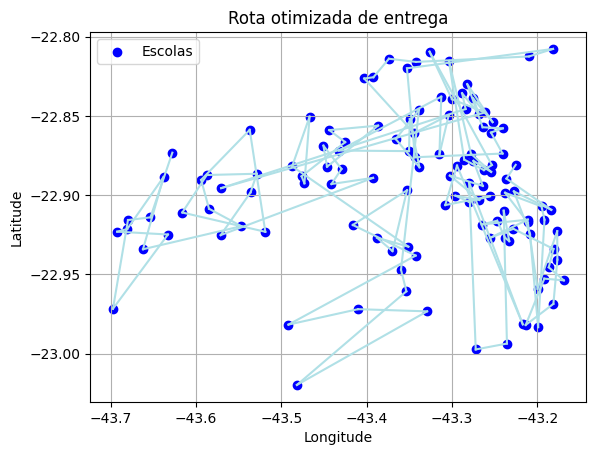

<Figure size 1200x800 with 0 Axes>

In [50]:
plt.scatter(longitudes, latitudes, c='blue', label='Escolas')

for i in range(1, len(mesclado6)):
    plt.plot([longitudes.iloc[i - 1], longitudes.iloc[i]], [latitudes.iloc[i - 1], latitudes.iloc[i]], c='powderblue')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Rota otimizada de entrega')

# Show the plot
plt.legend()
plt.grid(True)
plt.figure(figsize=(12,8), dpi=100)
plt.show()